# CS156 Final Assignment Code Appendix

## Code Experiment Starts Here

In [56]:
# Importing libraries
from glob import glob
from PIL import Image
from resizeimage import resizeimage
from sklearn.model_selection import train_test_split
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [57]:
# create paths for all images
asian_images = glob('Asian/*')
black_images = glob('Black/*')
latinx_images = glob('Latinx/*')
white_images = glob('White/*')
ratio_images = glob('Ratio/*')
equal_ratio_images = glob('Equal/*')

asian = []
black = []
latinx = []
white = []
ratio = []
equal = []

dim = [64, 64]


# for each image path
for path in asian_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            image = image.convert('RGB')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, dim)
            # flatten the matrix to an array and append it to all flattened images
            asian.append(np.array(cover).flatten())

# for each image path
for path in black_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            image = image.convert('RGB')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, dim)
            # flatten the matrix to an array and append it to all flattened images
            black.append(np.array(cover).flatten())

# for each image path
for path in latinx_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            image = image.convert('RGB')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, dim)
            # flatten the matrix to an array and append it to all flattened images
            latinx.append(np.array(cover).flatten())

# for each image path
for path in white_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            image = image.convert('RGB')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, dim)
            # flatten the matrix to an array and append it to all flattened images
            white.append(np.array(cover).flatten())

for path in ratio_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            image = image.convert('RGB')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, dim)
            # flatten the matrix to an array and append it to all flattened images
            ratio.append(np.array(cover).flatten())

for path in equal_ratio_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            image = image.convert('RGB')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, dim)
            # flatten the matrix to an array and append it to all flattened images
            equal.append(np.array(cover).flatten())

asian = np.asarray(asian)
black = np.asarray(black)
latinx = np.asarray(latinx)
white = np.asarray(white)
ratio = np.asarray(ratio)
equal = np.asarray(equal)

# Analysis between Asian and Latinx

(200, 12288) (200,)


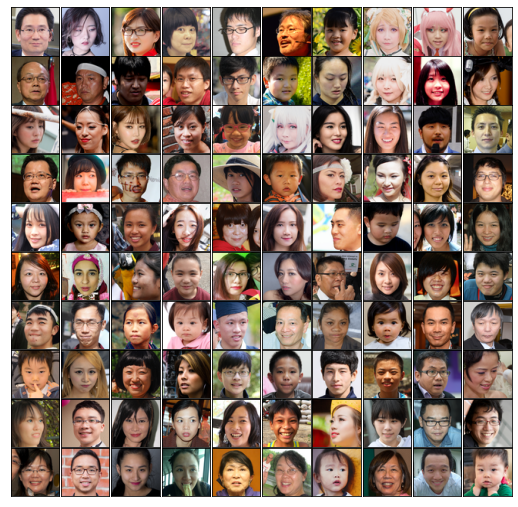

In [58]:
X = np.concatenate((asian, latinx))
Y = np.concatenate((np.zeros(len(asian)), np.ones(len(latinx))))
print(X.shape, Y.shape)


fig, axes = plt.subplots(10,10,figsize=(9,9),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(dim[0], dim[1], 3))

In [59]:
# Data Set Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

## Simple Logistic Regression Classifier

In [60]:
clf = LogisticRegression(max_iter = 500)
clf.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [61]:
predictions = clf.predict(X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        77
         1.0       1.00      1.00      1.00        83

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



This reports the 1.00 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is accurate.

In [122]:
predictions = clf.predict(X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57        21
         1.0       0.53      0.53      0.53        19

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



This reports the 0.55 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is NOT accurate. This is expected since now we can differentiate Asians and Latinx.

## PCA Reduction and Classification

Showing 9 out of 54 eigenvectors


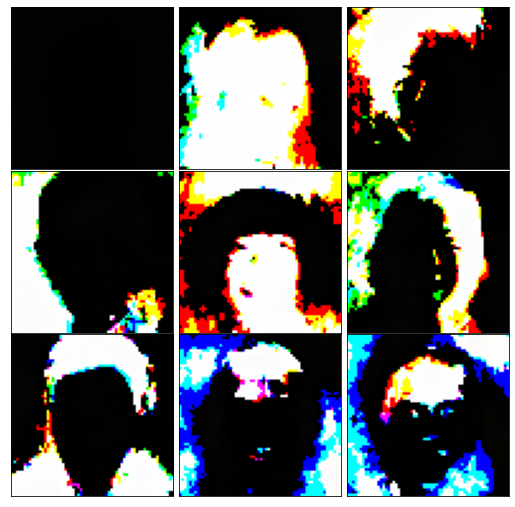

In [123]:
pca = decomposition.PCA(.9)
pca.fit(X_train)

fig, axes = plt.subplots(3, 3,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))

# Eigen Vectors
print("Showing 9 out of %s eigenvectors" % len(pca.components_))
for i, ax in enumerate(axes.flat):
    ax.imshow((pca.components_[i].reshape(dim[0], dim[1], 3)*255).astype(np.uint8))

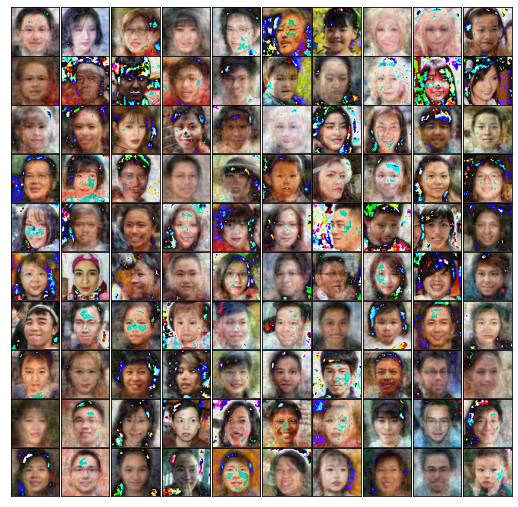

In [124]:
transformed_inputs = pca.transform(X)
rescaled_inputs = pca.inverse_transform(transformed_inputs)

fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
# Plot images
for i, ax in enumerate(axes.flat):
    ax.imshow((rescaled_inputs[i].reshape(dim[0], dim[1], 3)).astype(np.uint8))


In [125]:
clf_PCA = LogisticRegression(max_iter = 500)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
clf_PCA.fit(PCA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [66]:
PCA_predictions = clf_PCA.predict(PCA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, PCA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        77
         1.0       1.00      1.00      1.00        83

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



This reports the 1.00 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is accurate.

In [126]:
PCA_predictions = clf_PCA.predict(PCA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, PCA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59        21
         1.0       0.55      0.58      0.56        19

    accuracy                           0.57        40
   macro avg       0.57      0.58      0.57        40
weighted avg       0.58      0.57      0.58        40



This reports the 0.58 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is NOT accurate. This is expected since now we can differentiate Asians and Latinx.

In [127]:
# PCA but 3D
import numpy as np
from sklearn.decomposition import PCA
PCA3D = PCA(n_components=3)
PCA3D.fit(X)

# Transfrom images to PCA
X_3D = PCA3D.transform(X)

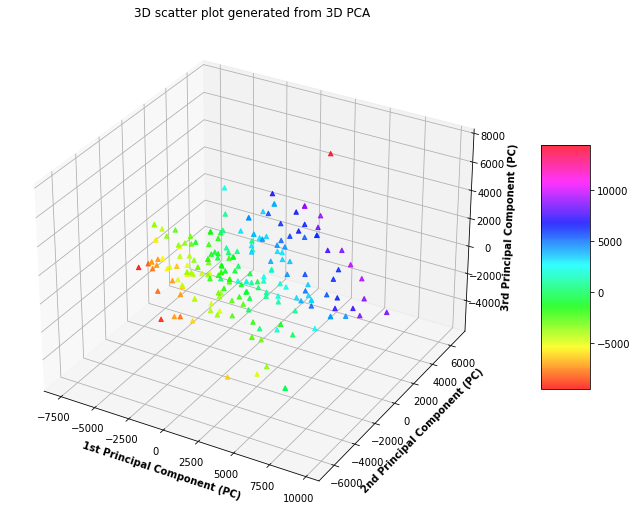

In [128]:
# Transpose PCA array
ThreeD_ARR = X_3D.T

fig = plt.figure(figsize = (16, 9))
ax_3d = plt.axes(projection = "3d")
ax_3d.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
my_cmap = plt.get_cmap('hsv') 

plot_3d = ax_3d.scatter3D(ThreeD_ARR[0], ThreeD_ARR[1], ThreeD_ARR[2],
                    alpha = 0.8,
                    c = (ThreeD_ARR[0] + ThreeD_ARR[1] + ThreeD_ARR[2]),
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot generated from 3D PCA")
ax_3d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_3d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
ax_3d.set_zlabel('3rd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_3d, ax = ax_3d, shrink = 0.5, aspect = 5)
plt.show()

## LDA Reduction and Classification

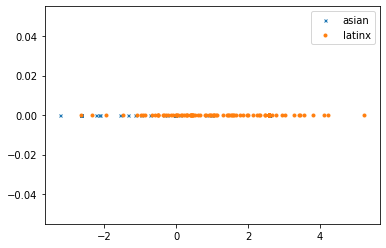

In [129]:
# LDA to reduce it down to 1D
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, Y_train)

transformed_asian = lda.transform(asian)
transformed_latinx = lda.transform(latinx)

plt.plot(transformed_asian, [0 for _ in range(len(transformed_asian))], 'x', markersize=3, label='asian')
plt.plot(transformed_latinx, [0 for _ in range(len(transformed_latinx))], 'o', markersize=3, label='latinx')
plt.legend()
plt.show()


In [130]:
LDA_X_train = lda.transform(X_train)
LDA_X_test = lda.transform(X_test)

clf_LDA = LogisticRegression(max_iter = 500)
clf_LDA.fit(LDA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [131]:
LDA_predictions = clf_LDA.predict(LDA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, LDA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        79
         1.0       0.85      1.00      0.92        81

    accuracy                           0.91       160
   macro avg       0.93      0.91      0.91       160
weighted avg       0.93      0.91      0.91       160



This reports the 0.91 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is accurate. This is expected since now we verifies that the classification works so now almost fully distinguish Asians and Latinx based on the trained model.

In [132]:
LDA_predictions = clf_LDA.predict(LDA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, LDA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.55      0.52      0.54        21
         1.0       0.50      0.53      0.51        19

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.53        40



This reports the 0.53 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is NOT accurate. This is NOT expected since the trained model had good accuracy but we don't get it from test sets. I think 80% of data is an overfitting.

# Analysis between black and whites

(200, 12288) (200,)


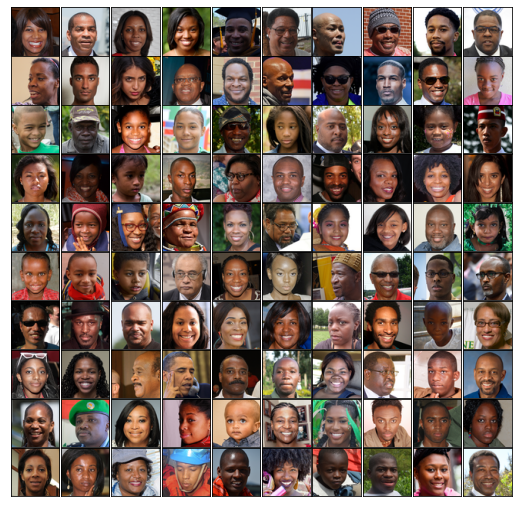

In [133]:
X = np.concatenate((black, white))
Y = np.concatenate((np.zeros(len(black)), np.ones(len(white))))
print(X.shape, Y.shape)


fig, axes = plt.subplots(10,10,figsize=(9,9),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(dim[0], dim[1], 3))

In [134]:
# Data Set Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [135]:
clf = LogisticRegression(max_iter = 500)
clf.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [136]:
predictions = clf.predict(X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        77
         1.0       1.00      1.00      1.00        83

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [137]:
predictions = clf.predict(X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        23
         1.0       0.74      0.82      0.78        17

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



This reports the 0.80 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is accurate. This is expected since now we verifies that the classification works so now almost fully distinguish blacks and whites based on the trained model.

Showing 9 out of 58 eigenvectors


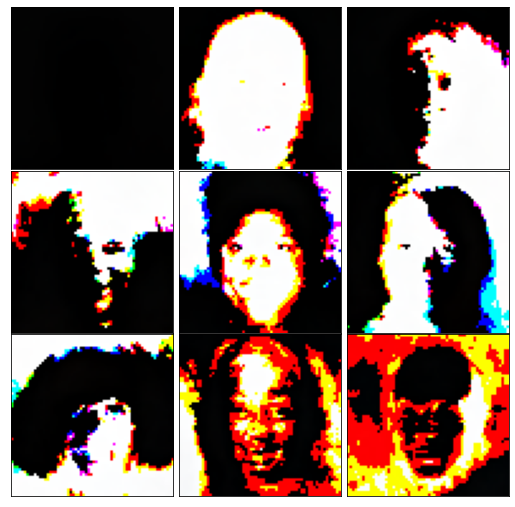

In [138]:
pca = decomposition.PCA(.9)
pca.fit(X_train)

fig, axes = plt.subplots(3, 3,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))

# Eigen Vectors
print("Showing 9 out of %s eigenvectors" % len(pca.components_))
for i, ax in enumerate(axes.flat):
    ax.imshow((pca.components_[i].reshape(dim[0], dim[1], 3)*255).astype(np.uint8))

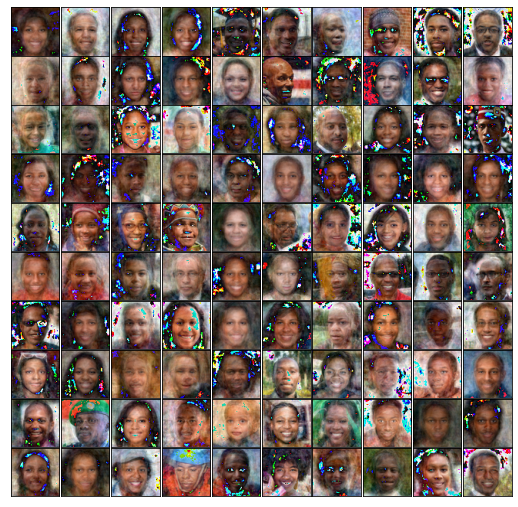

In [80]:
transformed_inputs = pca.transform(X)
rescaled_inputs = pca.inverse_transform(transformed_inputs)

fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
# Plot images
for i, ax in enumerate(axes.flat):
    ax.imshow((rescaled_inputs[i].reshape(dim[0], dim[1], 3)).astype(np.uint8))


In [81]:
clf_PCA = LogisticRegression(max_iter = 500)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
clf_PCA.fit(PCA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [82]:
PCA_predictions = clf_PCA.predict(PCA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, PCA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        79
         1.0       1.00      1.00      1.00        81

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [83]:
PCA_predictions = clf_PCA.predict(PCA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, PCA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82        21
         1.0       0.77      0.89      0.83        19

    accuracy                           0.82        40
   macro avg       0.83      0.83      0.82        40
weighted avg       0.83      0.82      0.82        40



This reports the 0.82 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is accurate. This is expected since now we verifies that the classification works so now almost fully distinguish blacks and whites based on the trained model.

In [84]:
# PCA but 3D
import numpy as np
from sklearn.decomposition import PCA
PCA3D = PCA(n_components=3)
PCA3D.fit(X)

# Transfrom images to PCA
X_3D = PCA3D.transform(X)

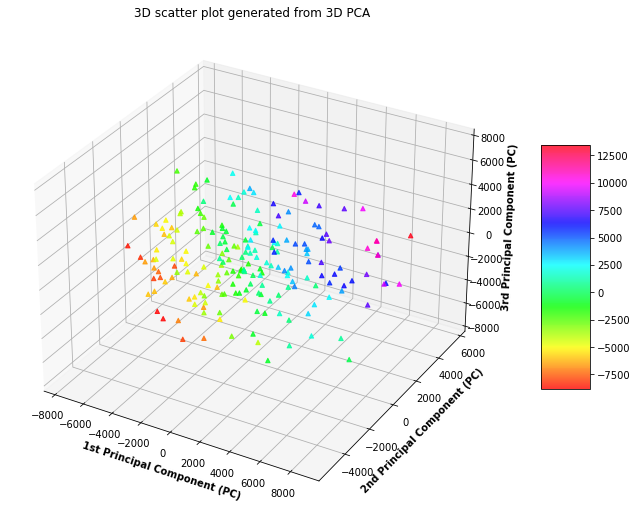

In [85]:
# Transpose PCA array
ThreeD_ARR = X_3D.T

fig = plt.figure(figsize = (16, 9))
ax_3d = plt.axes(projection = "3d")
ax_3d.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
my_cmap = plt.get_cmap('hsv') 

plot_3d = ax_3d.scatter3D(ThreeD_ARR[0], ThreeD_ARR[1], ThreeD_ARR[2],
                    alpha = 0.8,
                    c = (ThreeD_ARR[0] + ThreeD_ARR[1] + ThreeD_ARR[2]),
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot generated from 3D PCA")
ax_3d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_3d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
ax_3d.set_zlabel('3rd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_3d, ax = ax_3d, shrink = 0.5, aspect = 5)
plt.show()

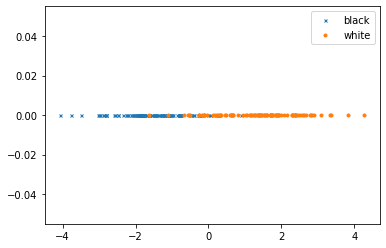

In [86]:
# LDA to reduce it down to 1D
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, Y_train)

transformed_black = lda.transform(black)
transformed_white = lda.transform(white)

plt.plot(transformed_black, [0 for _ in range(len(transformed_black))], 'x', markersize=3, label='black')
plt.plot(transformed_white, [0 for _ in range(len(transformed_white))], 'o', markersize=3, label='white')
plt.legend()
plt.show()


In [87]:
LDA_X_train = lda.transform(X_train)
LDA_X_test = lda.transform(X_test)

clf_LDA = LogisticRegression(max_iter = 500)
clf_LDA.fit(LDA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [88]:
LDA_predictions = clf_LDA.predict(LDA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, LDA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        79
         1.0       0.95      0.91      0.93        81

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.93      0.93      0.93       160



In [89]:
LDA_predictions = clf_LDA.predict(LDA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, LDA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85        21
         1.0       0.81      0.89      0.85        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



This reports the 0.85 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is accurate. This is expected since now we verifies that the classification works so now almost fully distinguish blacks and whites based on the trained model.

## Asian American facial recognition based on Ratio Population of the United States

(200, 12288) (200,)


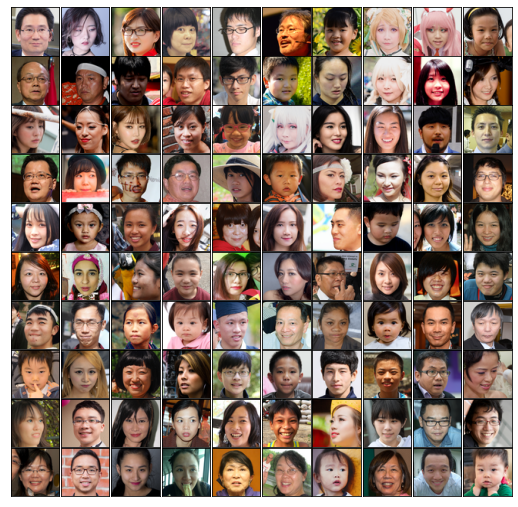

In [142]:
X = np.concatenate((asian, ratio))
Y = np.concatenate((np.zeros(len(asian)), np.ones(len(ratio))))
print(X.shape, Y.shape)


fig, axes = plt.subplots(10,10,figsize=(9,9),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(dim[0], dim[1], 3))

In [143]:
# Data Set Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [144]:
clf = LogisticRegression(max_iter = 500)
clf.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [145]:
predictions = clf.predict(X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        75
         1.0       0.99      0.94      0.96        85

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



In [146]:
predictions = clf.predict(X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76        25
         1.0       0.60      0.80      0.69        15

    accuracy                           0.73        40
   macro avg       0.72      0.74      0.72        40
weighted avg       0.76      0.72      0.73        40



This reports the 0.72 of f1 score. The score is significantly dropped based on the analysis had only with Asians.

Showing 9 out of 59 eigenvectors


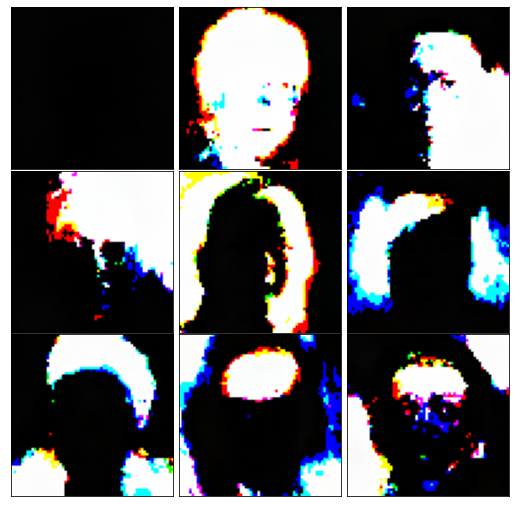

In [147]:
pca = decomposition.PCA(.9)
pca.fit(X_train)

fig, axes = plt.subplots(3, 3,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))

# Eigen Vectors
print("Showing 9 out of %s eigenvectors" % len(pca.components_))
for i, ax in enumerate(axes.flat):
    ax.imshow((pca.components_[i].reshape(dim[0], dim[1], 3)*255).astype(np.uint8))

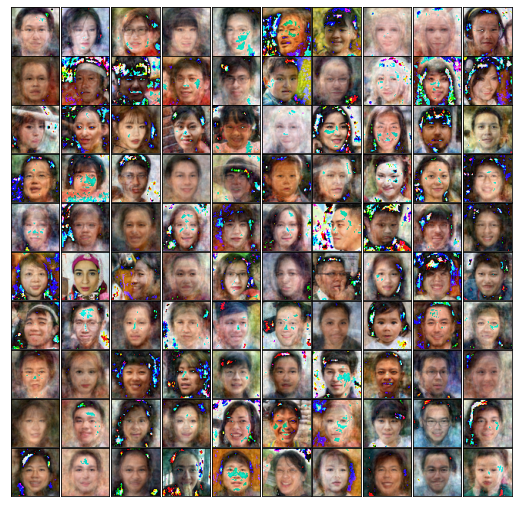

In [148]:
transformed_inputs = pca.transform(X)
rescaled_inputs = pca.inverse_transform(transformed_inputs)

fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
# Plot images
for i, ax in enumerate(axes.flat):
    ax.imshow((rescaled_inputs[i].reshape(dim[0], dim[1], 3)).astype(np.uint8))


In [149]:
clf_PCA = LogisticRegression(max_iter = 500)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
clf_PCA.fit(PCA_X_train, Y_train)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [150]:
PCA_predictions = clf_PCA.predict(PCA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, PCA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90        75
         1.0       0.94      0.87      0.90        85

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160



In [151]:
PCA_predictions = clf_PCA.predict(PCA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, PCA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.70      0.56      0.62        25
         1.0       0.45      0.60      0.51        15

    accuracy                           0.57        40
   macro avg       0.57      0.58      0.57        40
weighted avg       0.61      0.57      0.58        40



This reports the 0.57 of f1 score. The accuracy is significantly dropped down.

In [152]:
# PCA but 3D
import numpy as np
from sklearn.decomposition import PCA
PCA3D = PCA(n_components=3)
PCA3D.fit(X)

# Transfrom images to PCA
X_3D = PCA3D.transform(X)

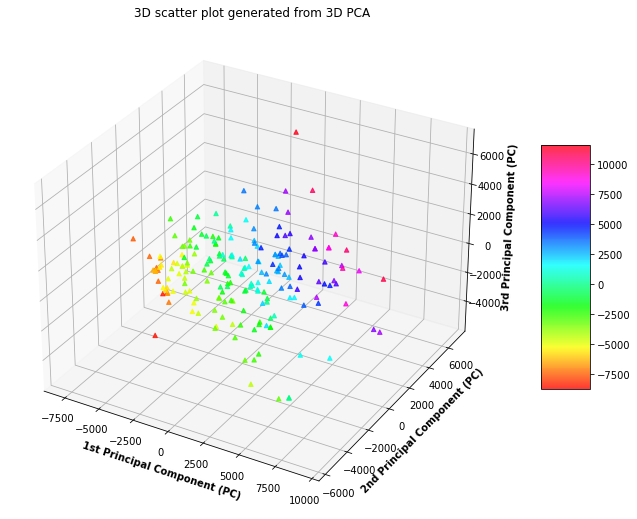

In [153]:
# Transpose PCA array
ThreeD_ARR = X_3D.T

fig = plt.figure(figsize = (16, 9))
ax_3d = plt.axes(projection = "3d")
ax_3d.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
my_cmap = plt.get_cmap('hsv') 

plot_3d = ax_3d.scatter3D(ThreeD_ARR[0], ThreeD_ARR[1], ThreeD_ARR[2],
                    alpha = 0.8,
                    c = (ThreeD_ARR[0] + ThreeD_ARR[1] + ThreeD_ARR[2]),
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot generated from 3D PCA")
ax_3d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_3d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
ax_3d.set_zlabel('3rd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_3d, ax = ax_3d, shrink = 0.5, aspect = 5)
plt.show()

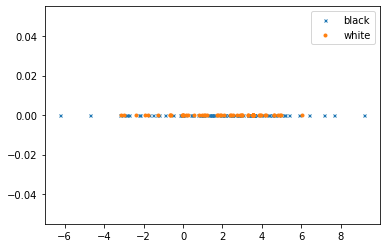

In [154]:
# LDA to reduce it down to 1D
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, Y_train)

transformed_black = lda.transform(black)
transformed_white = lda.transform(white)

plt.plot(transformed_black, [0 for _ in range(len(transformed_black))], 'x', markersize=3, label='black')
plt.plot(transformed_white, [0 for _ in range(len(transformed_white))], 'o', markersize=3, label='white')
plt.legend()
plt.show()


In [155]:
LDA_X_train = lda.transform(X_train)
LDA_X_test = lda.transform(X_test)

clf_LDA = LogisticRegression(max_iter = 500)
clf_LDA.fit(LDA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [156]:
LDA_predictions = clf_LDA.predict(LDA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, LDA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        75
         1.0       0.93      1.00      0.97        85

    accuracy                           0.96       160
   macro avg       0.97      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



In [157]:
LDA_predictions = clf_LDA.predict(LDA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, LDA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        25
         1.0       0.50      0.67      0.57        15

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.66      0.62      0.63        40



This reports the 0.62 of f1 score. The accuracy is significantly dropped down.

# Asian Recognition in Fair Ratio

(200, 12288) (200,)


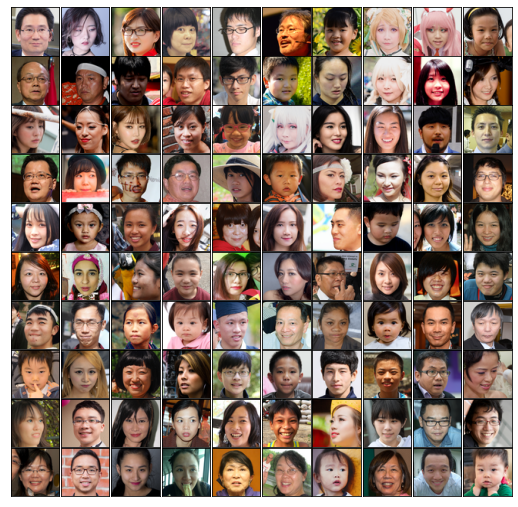

In [158]:
X = np.concatenate((asian, equal))
Y = np.concatenate((np.zeros(len(asian)), np.ones(len(equal))))
print(X.shape, Y.shape)


fig, axes = plt.subplots(10,10,figsize=(9,9),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(dim[0], dim[1], 3))

In [159]:
# Data Set Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

## Simple Logistic Regression Classifier

In [160]:
clf = LogisticRegression(max_iter = 500)
clf.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [161]:
predictions = clf.predict(X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        81
         1.0       0.92      0.86      0.89        79

    accuracy                           0.89       160
   macro avg       0.90      0.89      0.89       160
weighted avg       0.90      0.89      0.89       160



This reports the 0.97 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is accurate.

In [162]:
predictions = clf.predict(X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.61      0.58      0.59        19
         1.0       0.64      0.67      0.65        21

    accuracy                           0.62        40
   macro avg       0.62      0.62      0.62        40
weighted avg       0.62      0.62      0.62        40



This reports the 0.62 of f1 score. The accuracy is significantly dropped down.

## PCA Reduction and Classification

Showing 9 out of 53 eigenvectors


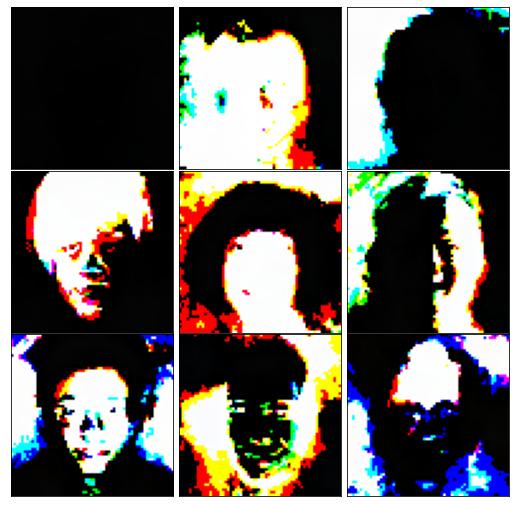

In [163]:
pca = decomposition.PCA(.9)
pca.fit(X_train)

fig, axes = plt.subplots(3, 3,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))

# Eigen Vectors
print("Showing 9 out of %s eigenvectors" % len(pca.components_))
for i, ax in enumerate(axes.flat):
    ax.imshow((pca.components_[i].reshape(dim[0], dim[1], 3)*255).astype(np.uint8))

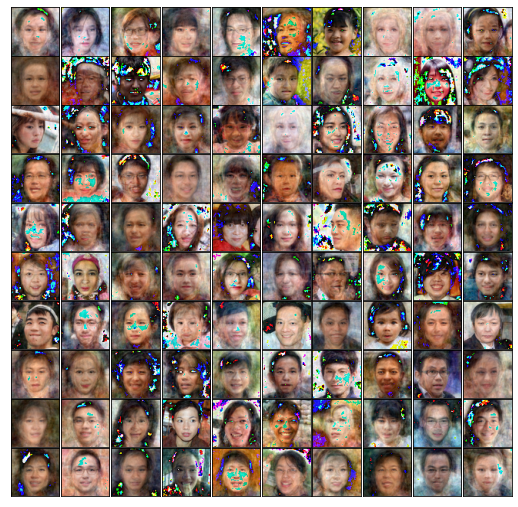

In [164]:
transformed_inputs = pca.transform(X)
rescaled_inputs = pca.inverse_transform(transformed_inputs)

fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
# Plot images
for i, ax in enumerate(axes.flat):
    ax.imshow((rescaled_inputs[i].reshape(dim[0], dim[1], 3)).astype(np.uint8))


In [165]:
clf_PCA = LogisticRegression(max_iter = 500)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
clf_PCA.fit(PCA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [166]:
PCA_predictions = clf_PCA.predict(PCA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, PCA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80        81
         1.0       0.82      0.73      0.77        79

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.79      0.79      0.79       160



This reports the 0.79 of f1 score. It is slightly better than ratio population of the United States.

In [168]:
PCA_predictions = clf_PCA.predict(PCA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, PCA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74        19
         1.0       0.75      0.86      0.80        21

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40



This reports the 0.78 of f1 score. It is slightly better than ratio population of the United States.

In [169]:
# PCA but 3D
import numpy as np
from sklearn.decomposition import PCA
PCA3D = PCA(n_components=3)
PCA3D.fit(X)

# Transfrom images to PCA
X_3D = PCA3D.transform(X)

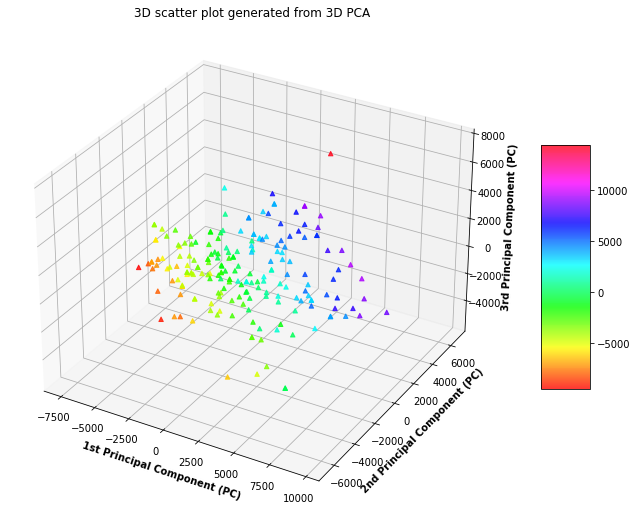

In [170]:
# Transpose PCA array
ThreeD_ARR = X_3D.T

fig = plt.figure(figsize = (16, 9))
ax_3d = plt.axes(projection = "3d")
ax_3d.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
my_cmap = plt.get_cmap('hsv') 

plot_3d = ax_3d.scatter3D(ThreeD_ARR[0], ThreeD_ARR[1], ThreeD_ARR[2],
                    alpha = 0.8,
                    c = (ThreeD_ARR[0] + ThreeD_ARR[1] + ThreeD_ARR[2]),
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot generated from 3D PCA")
ax_3d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_3d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
ax_3d.set_zlabel('3rd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_3d, ax = ax_3d, shrink = 0.5, aspect = 5)
plt.show()

## LDA Reduction and Classification

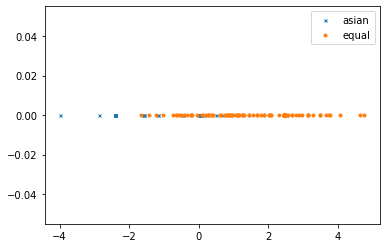

In [171]:
# LDA to reduce it down to 1D
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, Y_train)

transformed_asian = lda.transform(asian)
transformed_equal = lda.transform(latinx)

plt.plot(transformed_asian, [0 for _ in range(len(transformed_asian))], 'x', markersize=3, label='asian')
plt.plot(transformed_equal, [0 for _ in range(len(transformed_equal))], 'o', markersize=3, label='equal')
plt.legend()
plt.show()


In [172]:
LDA_X_train = lda.transform(X_train)
LDA_X_test = lda.transform(X_test)

clf_LDA = LogisticRegression(max_iter = 500)
clf_LDA.fit(LDA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [173]:
LDA_predictions = clf_LDA.predict(LDA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, LDA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        81
         1.0       1.00      0.78      0.88        79

    accuracy                           0.89       160
   macro avg       0.91      0.89      0.89       160
weighted avg       0.91      0.89      0.89       160



This reports the 0.89 of f1 score. It is much better than ratio population of the United States.

In [174]:
LDA_predictions = clf_LDA.predict(LDA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, LDA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57        19
         1.0       0.62      0.71      0.67        21

    accuracy                           0.62        40
   macro avg       0.62      0.62      0.62        40
weighted avg       0.62      0.62      0.62        40



This reports the 0.62 of f1 score. The accuracy dropped down than the previous analyses.